# Dataset
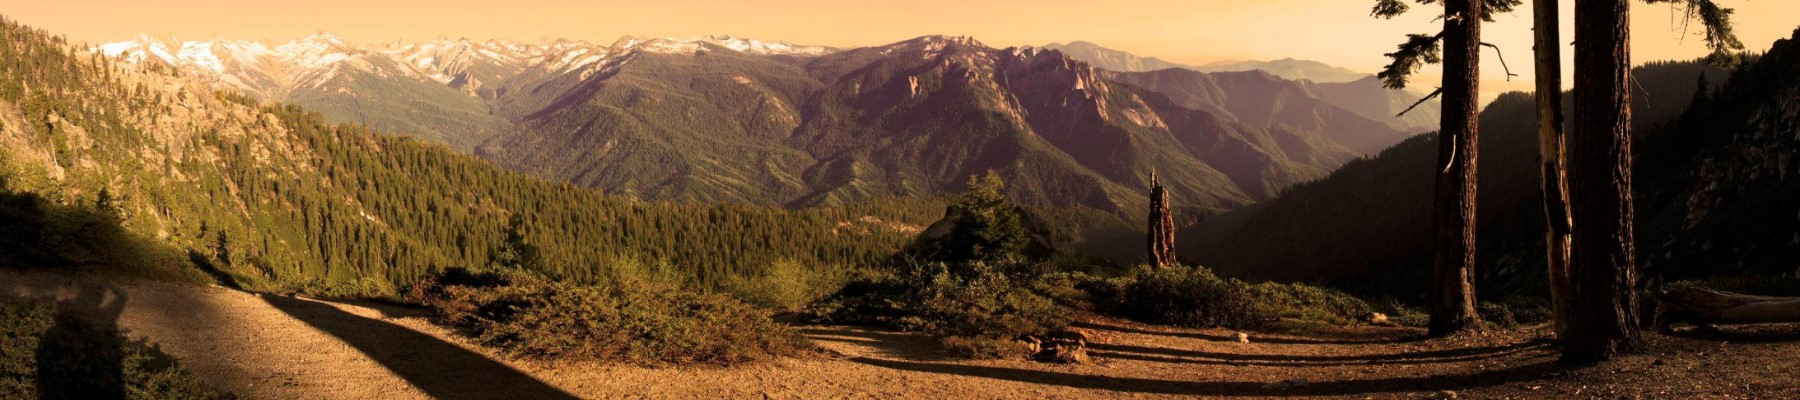

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity



# Data Exploring

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean)

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  object 
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


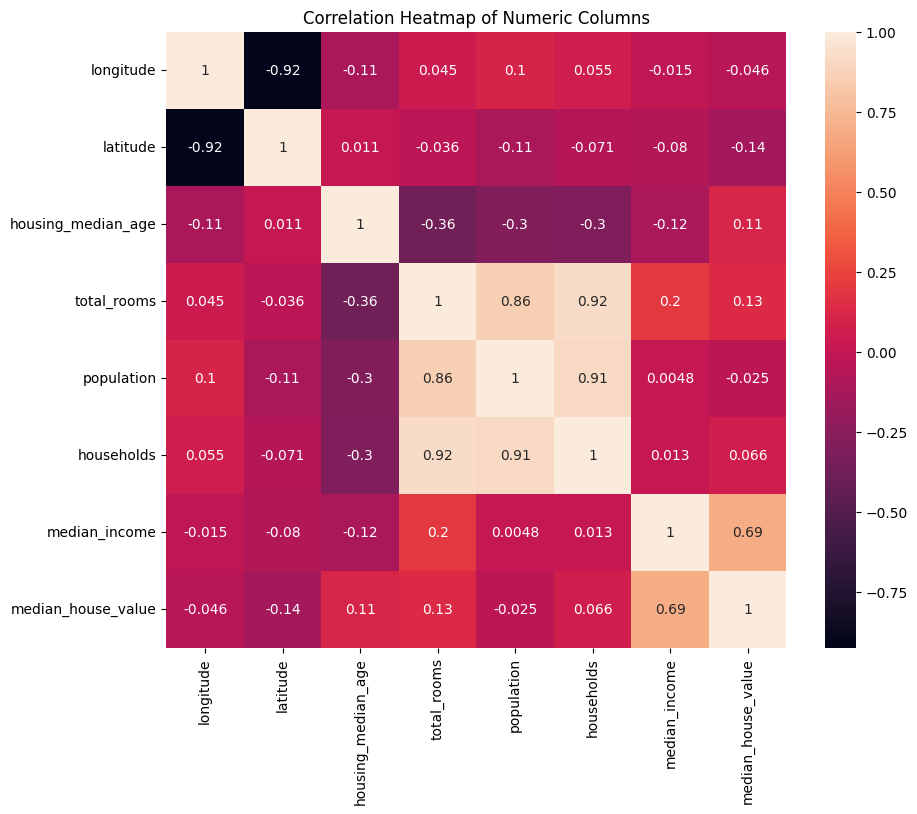

In [ ]:
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include='number')
correlations = numeric_data.corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation Heatmap of Numeric Columns')

plt.show()

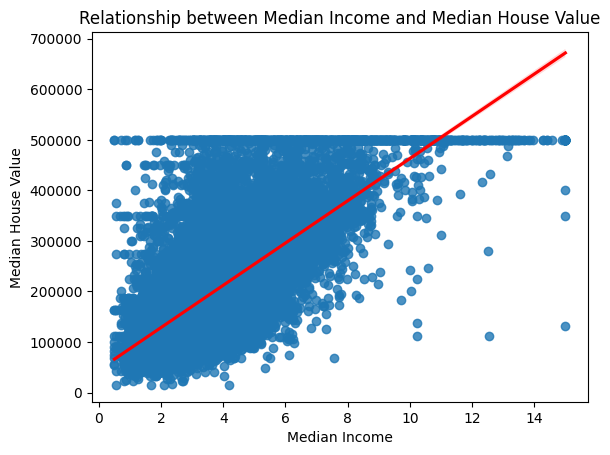

In [ ]:
# Create the regplot
sns.regplot(x='median_income', y='median_house_value', data=data, line_kws={'color':'red'})
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [ ]:

data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<ipython-input-153-cb5c105e63af>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='ocean_proximity', y='median_house_value', palette='viridis', linewidth=1)


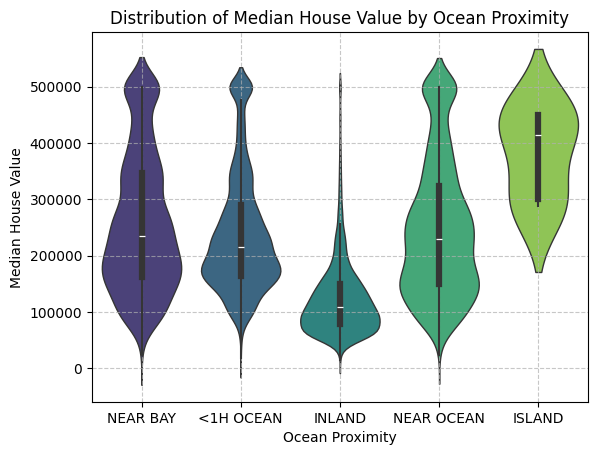

In [ ]:
sns.violinplot(data=data, x='ocean_proximity', y='median_house_value', palette='viridis', linewidth=1)
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Encoding
data.select_dtypes(include = 'object')

,total_bedrooms,ocean_proximity
0,129.0,NEAR BAY
1,1106.0,NEAR BAY
2,190.0,NEAR BAY
3,235.0,NEAR BAY
4,280.0,NEAR BAY
...,...,...
20635,374.0,INLAND
20636,150.0,INLAND
20637,485.0,INLAND
20638,409.0,INLAND


In [ ]:
data['total_bedrooms'].dtype

dtype('O')

In [ ]:
non_numeric_values = data['total_bedrooms'].apply(lambda x: not isinstance(x, (int, float)))

if non_numeric_values.any():
    data = data[~non_numeric_values]

data['total_bedrooms'] = data['total_bedrooms'].astype(float)


<ipython-input-156-1b3713ed88f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'] = data['total_bedrooms'].astype(float)


In [ ]:
data['total_bedrooms'].dtype

dtype('float64')

# Feature Engineer

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [ ]:
data['ocean_proximity'].head()

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64

In [ ]:
#scalling
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
scaler = MinMaxScaler()
data['total_rooms'] = scaler.fit_transform(data[['total_rooms']])
data['population'] = scaler.fit_transform(data[['population']])
data['households'] = scaler.fit_transform(data[['households']])
data['median_house_value'] = scaler.fit_transform(data[['median_house_value']])

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis = 1)
y = data['median_house_value']

In [ ]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,0.022331,129.0,0.008941,0.020556,8.3252,3
1,-122.22,37.86,21.0,0.180503,1106.0,0.067210,0.186976,8.3014,3
2,-122.24,37.85,52.0,0.037260,190.0,0.013818,0.028943,7.2574,3
3,-122.25,37.85,52.0,0.032352,235.0,0.015555,0.035849,5.6431,3
4,-122.25,37.85,52.0,0.041330,280.0,0.015752,0.042427,3.8462,3


In [ ]:
y.head()

0    0.902266
1    0.708247
2    0.695051
3    0.672783
4    0.674638
Name: median_house_value, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
train_data = X_train.join(y_train)

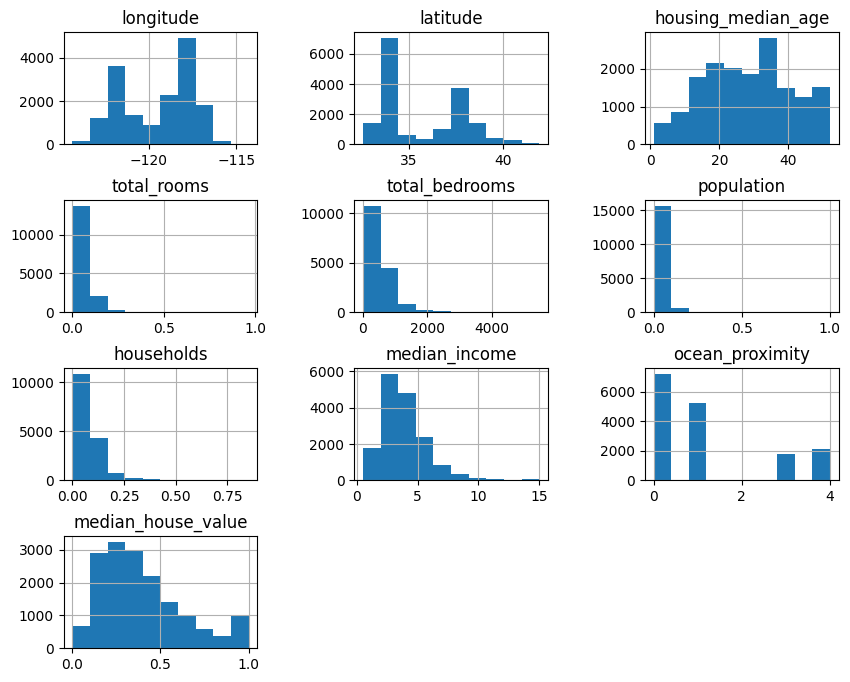

In [ ]:
#Distribution of training data
train_data.hist(figsize=(10,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing as needed
plt.show()

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_new, columns=selected_features)

In [ ]:
selected_features_df.head()

,latitude,housing_median_age,total_rooms,median_income,ocean_proximity
0,37.88,41.0,0.022331,8.3252,3.0
1,37.86,21.0,0.180503,8.3014,3.0
2,37.85,52.0,0.037260,7.2574,3.0
3,37.85,52.0,0.032352,5.6431,3.0
4,37.85,52.0,0.041330,3.8462,3.0


# Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2score = r2_score(y_test, y_pred)
print("R2 Score:", r2score)



Mean Squared Error: 0.020527199876168148
R2 Score: 0.6431580780038985


# Random Forest Regression model

In [ ]:
model = RandomForestRegressor()
# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2score = r2_score(y_test, y_pred)
print("R2 Score:", r2score)


Mean Squared Error: 0.010337955521579668
R2 Score: 0.8202864521179235
